## Heart Disease Prediction using Decision Tree and Random Forest

## Project: Final Project - Decision Tree
Dataset: UCI Heart Disease (Cleveland) Dataset
Author: [Virakden - Hikaru]
Description:
- This project implements a Decision Tree classifier to predict the
- presence of heart disease using the classic UCI Cleveland dataset.
- The workflow includes data loading, cleaning, exploratory analysis,
- model training, evaluation, visualization, and comparison with Random Forest.
- Extra tasks: try different split criteria and discuss feature importances.

### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

### 2. Define Dataset Column Names

In [2]:
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]


### 3. Load and Preprocess the Dataset

In [3]:
# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url, names=columns)

# Replace missing values ("?") with NaN and convert columns to numeric
df = df.replace('?', np.nan)
for col in ['ca', 'thal']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values for simplicity (could use imputation)
df = df.dropna()
df = df.astype(float)

# Binarize the target column (0: No disease, 1: Disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("Dataset info after cleaning:")
print(df.info())
print(df.head())

Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  

### 4. Exploratory Data Analysis (EDA)

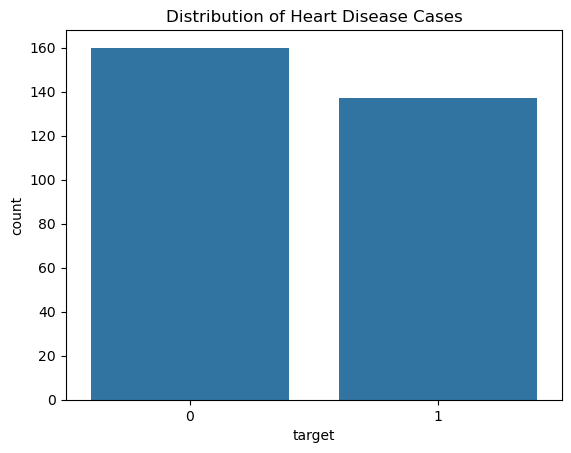

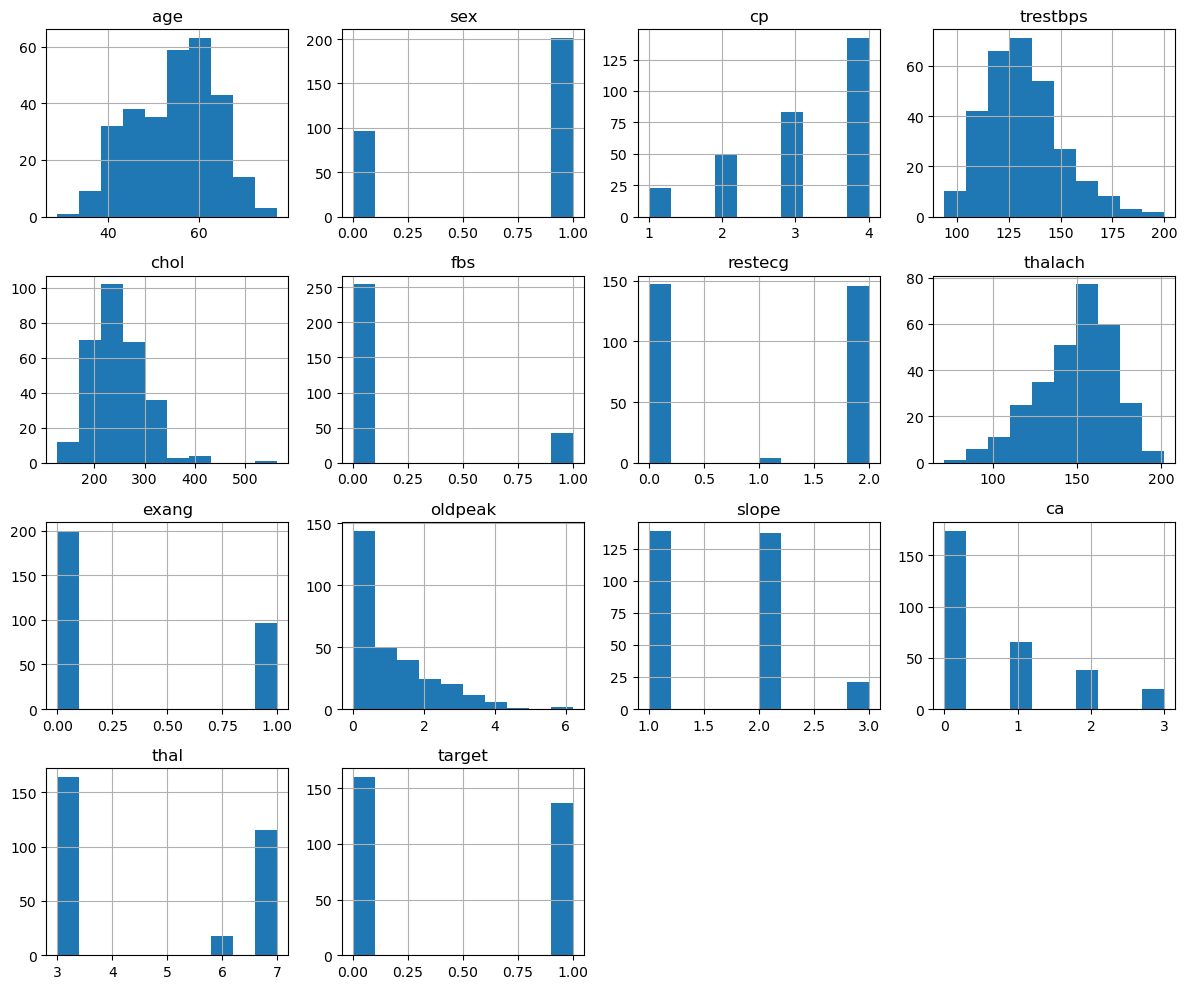

In [4]:
# Visualize class distribution
sns.countplot(x="target", data=df)
plt.title("Distribution of Heart Disease Cases")
plt.show()

# Histograms of feature distributions
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


### 5. Feature Preparation & Train-Test Split

In [5]:
# Separate features and target, split data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### 6. Decision Tree Model Training & Evaluation

Decision Tree Accuracy: 0.7
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        32
           1       0.69      0.64      0.67        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60

Decision Tree Confusion Matrix:
 [[24  8]
 [10 18]]


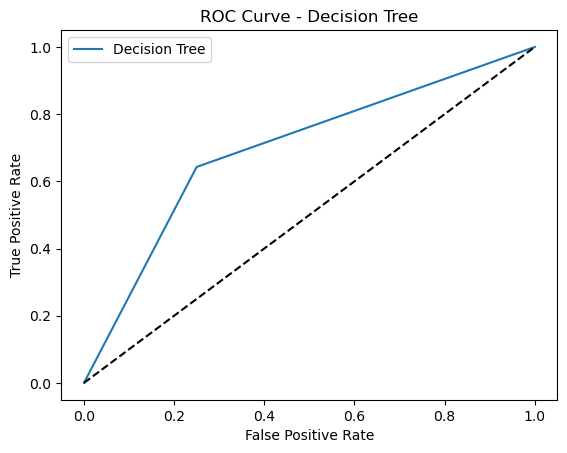

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot ROC curve for Decision Tree
y_proba = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Decision Tree")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


### 7. Visualize Decision Tree Structure

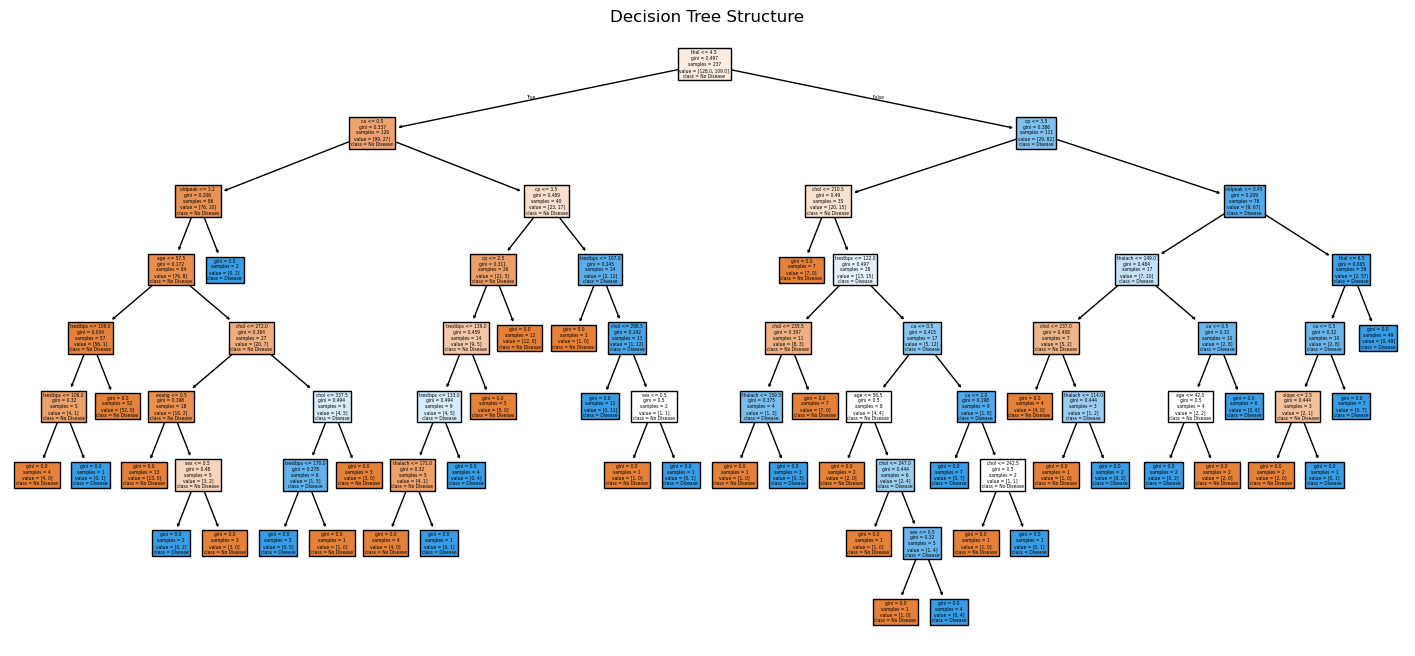

In [7]:
plt.figure(figsize=(18, 8))
plot_tree(
    dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True
)
plt.title("Decision Tree Structure")
plt.show()


### 8. Feature Importance Visualization (Decision Tree)

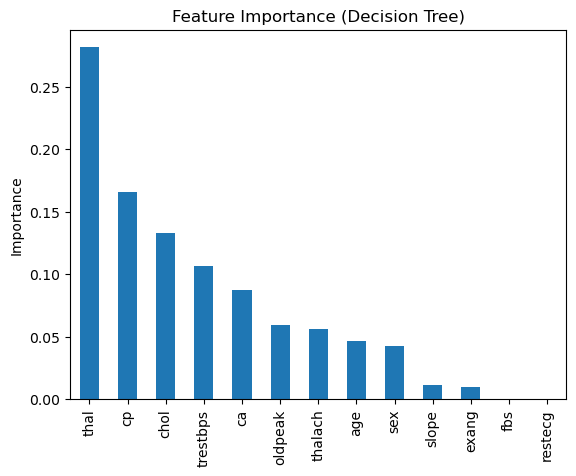

In [8]:
importances = dt.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feat_importance.plot(kind="bar")
plt.title("Feature Importance (Decision Tree)")
plt.ylabel("Importance")
plt.show()


### 9. Random Forest Model & Comparison

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_rf_pred)
)


Random Forest Accuracy: 0.85
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



### 10. Split Criterion Comparison

In [10]:
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)
gini_acc = accuracy_score(y_test, dt_gini.predict(X_test))

dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)
entropy_acc = accuracy_score(y_test, dt_entropy.predict(X_test))

print(f"Decision Tree Accuracy (Gini): {gini_acc:.3f}")
print(f"Decision Tree Accuracy (Entropy): {entropy_acc:.3f}")


Decision Tree Accuracy (Gini): 0.700
Decision Tree Accuracy (Entropy): 0.767


### 11. Feature Importance

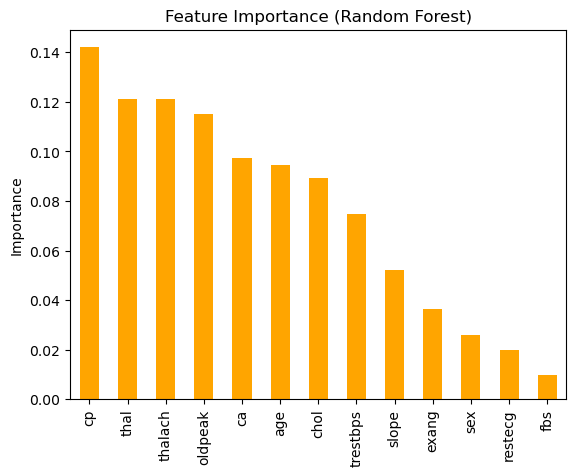

In [11]:
rf_importances = pd.Series(rf.feature_importances_, index=features).sort_values(
    ascending=False
)
rf_importances.plot(kind="bar", color="orange")
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.show()
